<a href="https://colab.research.google.com/github/ankitasutar/My_ML_DL_Projects/blob/main/Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
import cv2
import os
import PIL

In [3]:
import tensorflow as tf
from tensorflow import keras

In [25]:
from tensorflow.keras import layers

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)
#untar will unzip the file

228818944/228813984 [==============================] - 1s 0us/step


In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/tulips/6770436217_281da51e49_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4604238410_bcec9da4a0_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 PosixPath('datasets/flower_photos/tulips/17189526216_fa24dd541a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9030467406_05e93ff171_n.jpg')]

In [9]:
image_count=len(list(data_dir.glob("*/*.jpg")))
print(image_count)

3670


In [10]:
roses=list(data_dir.glob("roses/*"))
roses[:4]

[PosixPath('datasets/flower_photos/roses/3661675690_ed2d05fa5f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg')]

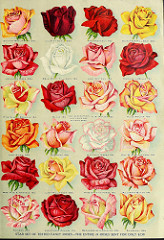

In [11]:
PIL.Image.open(str(roses[1]))

In [12]:
flowers_images_dict={
    "roses":list(data_dir.glob("roses/*")),
    "daisy":list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "tulips":list(data_dir.glob("tulips/*"))
}

In [13]:
flowers_labels={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict["roses"]

[PosixPath('datasets/flower_photos/roses/3661675690_ed2d05fa5f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3109712111_75cea2dee6.jpg'),
 PosixPath('datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6016195304_75306bb79a.jpg'),
 PosixPath('datasets/flower_photos/roses/18760363474_a707331322_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('datasets/flower_photos/roses/269037241_07fceff56a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8562144481_1d629848ff.jpg'),
 Pos

In [15]:
img=cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(245, 320, 3)

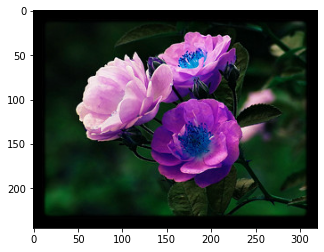

In [16]:
plt.imshow(img)

In [17]:
x,y=[],[]

for flowers_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels[flowers_name])

In [18]:
len(x)

3670

In [19]:
x=np.array(x)
y=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [22]:
from tensorflow.keras.models import Sequential

In [29]:
classes=5

model=Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(classes)
    
])

model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
81/81 [==============================] - 2s 21ms/step - loss: 1.3302 - accuracy: 0.4367
Epoch 2/30
81/81 [==============================] - 2s 20ms/step - loss: 0.9710 - accuracy: 0.6146
Epoch 3/30
81/81 [==============================] - 2s 20ms/step - loss: 0.7849 - accuracy: 0.6952
Epoch 4/30
81/81 [==============================] - 2s 20ms/step - loss: 0.5979 - accuracy: 0.7762
Epoch 5/30
81/81 [==============================] - 2s 20ms/step - loss: 0.3936 - accuracy: 0.8587
Epoch 6/30
81/81 [==============================] - 2s 20ms/step - loss: 0.2239 - accuracy: 0.9268
Epoch 7/30
81/81 [==============================] - 2s 20ms/step - loss: 0.1383 - accuracy: 0.9595
Epoch 8/30
81/81 [==============================] - 2s 20ms/step - loss: 0.0462 - accuracy: 0.9883
Epoch 9/30
81/81 [==============================] - 2s 20ms/step - loss: 0.0732 - accuracy: 0.9833
Epoch 10/30
81/81 [==============================] - 2s 20ms/step - loss: 0.0622 - accuracy: 0.9825
Epoch 11/

In [30]:
model.evaluate(x_test_scaled,y_test)

35/35 [==============================] - 1s 15ms/step - loss: 2.1380 - accuracy: 0.6567


[2.1379570960998535, 0.6566757559776306]

In [32]:
predictions = model.predict(x_test_scaled)
predictions

array([[ -7.4641495 ,  -2.847477  ,  -1.1813834 ,   5.2519703 ,
         13.268343  ],
       [  2.6472487 ,  -7.5190973 ,  -4.7735167 ,  11.954991  ,
          5.058673  ],
       [  1.1536727 ,   3.5092506 ,   6.1501975 ,  -8.547711  ,
         -2.211711  ],
       ...,
       [ -2.0035045 ,  -3.7025874 ,  -3.4421208 ,   5.3905683 ,
          9.018814  ],
       [  1.0229623 ,   8.50222   ,  -1.4581096 ,  -9.644121  ,
          6.2189765 ],
       [ -2.7074387 , -15.427436  ,   8.078035  ,  17.94576   ,
          0.95086205]], dtype=float32)

In [35]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [38]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(classes)
    
])

model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
81/81 [==============================] - 3s 23ms/step - loss: 1.2817 - accuracy: 0.4578
Epoch 2/30
81/81 [==============================] - 2s 22ms/step - loss: 1.0490 - accuracy: 0.5765
Epoch 3/30
81/81 [==============================] - 2s 22ms/step - loss: 0.9339 - accuracy: 0.6333
Epoch 4/30
81/81 [==============================] - 2s 22ms/step - loss: 0.8698 - accuracy: 0.6633
Epoch 5/30
81/81 [==============================] - 2s 22ms/step - loss: 0.8100 - accuracy: 0.6859
Epoch 6/30
81/81 [==============================] - 2s 22ms/step - loss: 0.7727 - accuracy: 0.7007
Epoch 7/30
81/81 [==============================] - 2s 22ms/step - loss: 0.7189 - accuracy: 0.7232
Epoch 8/30
81/81 [==============================] - 2s 23ms/step - loss: 0.6792 - accuracy: 0.7404
Epoch 9/30
81/81 [==============================] - 2s 23ms/step - loss: 0.6620 - accuracy: 0.7427
Epoch 10/30
81/81 [==============================] - 2s 23ms/step - loss: 0.6481 - accuracy: 0.7524
Epoch 11/

In [40]:
model.evaluate(x_test_scaled,y_test)


35/35 [==============================] - 1s 12ms/step - loss: 1.2004 - accuracy: 0.7039


[1.2004226446151733, 0.7039055228233337]

In [41]:
predictions=model.predict(x_test_scaled)

In [46]:
predictions

array([[  5.7704597 ,   0.6540051 ,  -6.357657  ,   0.6943519 ,
         10.722698  ],
       [ -8.64554   , -11.850823  ,  -4.556594  ,  17.28371   ,
          4.0429873 ],
       [  4.77215   ,  -1.7102116 ,  -2.3603253 ,  -5.439658  ,
          0.28843638],
       ...,
       [  1.3281438 ,  -7.2611895 ,  -4.5680585 ,   7.7245517 ,
          2.653786  ],
       [  1.7922126 ,   4.257645  ,  -1.6386743 ,  -5.811671  ,
          2.4264762 ],
       [-11.119577  , -23.36988   ,  11.216879  ,  15.141291  ,
         -5.2652907 ]], dtype=float32)

In [43]:
score=tf.nn.softmax(predictions[0])

In [48]:
score=np.argmax(predictions[0])
score

4

In [44]:
np.argmax(score)

4

In [45]:
y_test[0]

4

In [50]:
import seaborn as sns

Text(69.0, 0.5, 'truth')

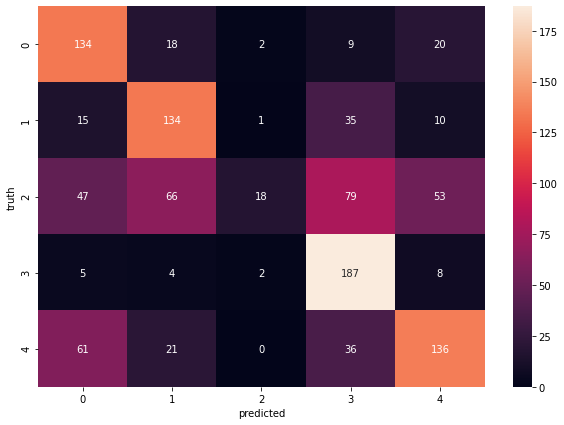

In [51]:
y_pre=model.predict(x_test)
y_pred=[np.argmax(i) for i in y_pre]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")